# Import the libraries

In [1]:
%matplotlib inline
import numpy as np
#for the sigmoid function we need expit() from scipy
import scipy.special
#library for plotting arrays
import matplotlib.pyplot as plt
# A particularly interesting backend, provided by IPython, is the inline backend. 
# This is available only for the Jupyter Notebook and the Jupyter QtConsole. 
# It can be invoked as follows: %matplotlib inline
# With this backend, the output of plotting commands is displayed inline 
# within frontends like the Jupyter notebook, directly below the code cell that produced it. 
# The resulting plots are inside this notebook, not an external window.

import pandas as pd # to manage data frames and reading csv files

# Loading dataset and some pre processing

In [2]:
df = pd.read_csv("breast_cancer_data.csv")

In [3]:
print(df.head(3))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33            184.6      2019.0            0.1622   
1     ...               23.41            158.8      1956.0            0.1238   
2     ...               25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points

In [4]:
#dropping unnessary columns incluing id numbers
df.drop(df.columns[[0,32]], axis=1, inplace=True)

In [5]:
print(df.head(100))

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          M       17.990         10.38          122.80     1001.0   
1          M       20.570         17.77          132.90     1326.0   
2          M       19.690         21.25          130.00     1203.0   
3          M       11.420         20.38           77.58      386.1   
4          M       20.290         14.34          135.10     1297.0   
5          M       12.450         15.70           82.57      477.1   
6          M       18.250         19.98          119.60     1040.0   
7          M       13.710         20.83           90.20      577.9   
8          M       13.000         21.82           87.50      519.8   
9          M       12.460         24.04           83.97      475.9   
10         M       16.020         23.24          102.70      797.8   
11         M       15.780         17.89          103.60      781.0   
12         M       19.170         24.80          132.40     1123.0   
13         M       1

# binariseing the class label

In [6]:
#using dummies to binarise the dataset
#coverting the class lebel value to binary
df['diagnosis']=pd.get_dummies(df['diagnosis'], prefix='diagnosis') 
#converting the class label into int
#pd.to_numeric(df['diagnosis'], errors='coerce')

print(df.head(100))


    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           0       17.990         10.38          122.80     1001.0   
1           0       20.570         17.77          132.90     1326.0   
2           0       19.690         21.25          130.00     1203.0   
3           0       11.420         20.38           77.58      386.1   
4           0       20.290         14.34          135.10     1297.0   
5           0       12.450         15.70           82.57      477.1   
6           0       18.250         19.98          119.60     1040.0   
7           0       13.710         20.83           90.20      577.9   
8           0       13.000         21.82           87.50      519.8   
9           0       12.460         24.04           83.97      475.9   
10          0       16.020         23.24          102.70      797.8   
11          0       15.780         17.89          103.60      781.0   
12          0       19.170         24.80          132.40     1123.0   
13    

# Spliting the dataset into test and train

In [7]:
mn = np.random.rand(len(df)) < 0.8
df_train = df[mn]
df_test = df[~mn]
#train.shape+test.shape
#return true if no data is missin while spliting
 
if (df_train.size+df_test.size==df.size):
    print("no data was lost during the splitting process")
if (df_train.size+df_test.size!=df.size):
    print("data was lost during the splitting process")

no data was lost during the splitting process


# Saving the dataset as CSV after splitting

In [8]:
#saving into csv files without header or indexnumbers
df.to_csv('breast_cancer_processed.csv',index=False,header=False)
df_train.to_csv('breast_cancer_train.csv',index=False,header=False)
df_test.to_csv('breast_cancer_test.csv',index=False,header=False)

# set global variables

In [9]:
#number of input, hidden and output nodes
input_nodes = 30 
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.3
batch_size = 50

# epochs is the number of training iterations 
epochs = 10
# datasets to read
# you can change these when trying out other datasets
train_file = "breast_cancer_train.csv"
test_file = "breast_cancer_test.csv"


# Loading the data set

In [10]:
#load the mnist training data CSV file into a list
#train_data_file = open("mnist/mnist_train_100.csv", 'r') # open and read the 100 instances in the text file
train_data_file = open(train_file, 'r')
train_data_list = train_data_file.readlines() # read all lines into memory 

train_data_file.close() 
print("train set size: ", len(train_data_list))

#testing the network
#load the mnist test data CSV file into a list
#test_data_file = open("mnist/mnist_test_10.csv", 'r') # read the file with 10 instances first
test_data_file = open(test_file, 'r') # read the file with 10 instances first
test_data_list = test_data_file.readlines()
test_data_file.close()
print("test set size: ", len(test_data_list))
print(train_data_list[0])

train set size:  456
test set size:  113
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05372999999999999,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189



# Artificial Neural Network class

In [11]:
class neuralNetwork:
    """Artificial Neural Network classifier.

    Parameters
    ------------
    lr : float
      Learning rate (between 0.0 and 1.0)
    ep : int
      Number of epochs for training the network towards achieving convergence
    batch_size : int
      Size of the training batch to be used when calculating the gradient descent. 
      batch_size = 0 standard gradient descent
      batch_size > 0 stochastic gradient descent 

    inodes : int
      Number of input nodes which is normally the number of features in an instance.
    hnodes : int
      Number of hidden nodes in the net.
    onodes : int
      Number of output nodes in the net.


    Attributes
    -----------
    wih : 2d-array
      Input2Hidden node weights after fitting 
    who : 2d-array
      Hidden2Output node weights after fitting 
    E : list
      Sum-of-squares error value in each epoch.
      
    Results : list
      Target and predicted class labels for the test data.
      
    Functions
    ---------
    activation_function : float (between 1 and -1)
        implments the sigmoid function which squashes the node input

    """

    def __init__(self, inputnodes=30, hiddennodes=200, outputnodes=10, learningrate=0.1, batch_size=50, epochs=10):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #link weight matrices, wih (input to hidden) and who (hidden to output)
        #a weight on link from node i to node j is w_ij
        
        
        #Draw random samples from a normal (Gaussian) distribution centered around 0.
        #numpy.random.normal(loc to centre gaussian=0.0, scale=1, size=dimensions of the array we want) 
        #scale is usually set to the standard deviation which is related to the number of incoming links i.e. 
        #1/sqrt(num of incoming inputs). we use pow to raise it to the power of -0.5.
        #We have set 0 as the centre of the guassian dist.
        # size is set to the dimensions of the number of hnodes, inodes and onodes
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        #set the learning rate
        self.lr = learningrate
        
        #set the batch size
        self.bs = batch_size
        
        #set the number of epochs
        self.ep = epochs
        
        #store errors at each epoch
        self.E= []
        
        #store results from testing the model
        #keep track of the network performance on each test instance
        self.results= []
        
        #define the activation function here
        #specify the sigmoid squashing function. Here expit() provides the sigmoid function.
        #lambda is a short cut function which is executed there and then with no def (i.e. like an anonymous function)
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
   
    def batch_input(self, input_list):
        """Yield consecutive batches of the specified size from the input list."""
        for i in range(0, len(input_list), self.bs):
            yield input_list[i:i + self.bs]
    
    #train the neural net
    #note the first part is very similar to the query function because they both require the forward pass
    def train(self, train_inputs):
        """Training the neural net. 
           This includes the forward pass ; error computation; 
           backprop of the error ; calculation of gradients and updating the weights.

            Parameters
            ----------
            train_inputs : {array-like}, shape = [n_instances, n_features]
            Training vectors, where n_instances is the number of training instances and
            n_features is the number of features.
            Note this contains all features including the class feature which is in first position
        
            Returns
            -------
            self : object
        """
      
        for e in range(self.ep):
            print("Training epoch#: ", e)
            sum_error = 0.0   
            for batch in self.batch_input(train_inputs):
                #creating variables to store the gradients   
                delta_who = 0
                delta_wih = 0
                
                # iterate through the inputs sent in
                for instance in batch:
                    # split it by the commas
                    all_values = instance.split(',') 
                    # scale and shift the inputs to address the problem of diminishing weights due to multiplying by zero
                    # divide the raw inputs which are in the range 0-255 by 255 will bring them into the range 0-1
                    # multiply by 0.99 to bring them into the range 0.0 - 0.99.
                    # add 0.01 to shift them up to the desired range 0.01 - 1. 
                    inputs = (np.asfarray(all_values[1:]))+ 0.01 #/ 255.0 * 0.99) + 0.01
                    #create the target output values for each instance so that we can use it with the neural net
                    #note we need 10 nodes where each represents one of the digits
                    targets = np.zeros(output_nodes)+ 0.01 #all initialised to 0.01
                    #all_value[0] has the target class label for this instance
                    targets[int(all_values[0])] = 0.99
        
                    #convert  inputs list to 2d array
                    inputs = np.array(inputs,  ndmin=2).T
                    targets = np.array(targets, ndmin=2).T

                    #calculate signals into hidden layer
                    hidden_inputs = np.dot(self.wih, inputs)
                    #calculate the signals emerging from the hidden layer
                    hidden_outputs = self.activation_function(hidden_inputs)

                    #calculate signals into final output layer
                    final_inputs=np.dot(self.who, hidden_outputs)
                    #calculate the signals emerging from final output layer
                    final_outputs = self.activation_function(final_inputs)
        
                    #to calculate the error we need to compute the element wise diff between target and actual
                    output_errors = targets - final_outputs
                    #Next distribute the error to the hidden layer such that hidden layer error
                    #is the output_errors, split by weights, recombined at hidden nodes
                    hidden_errors = np.dot(self.who.T, output_errors)
            
                       
                    ## for each instance accumilate the gradients from each instance
                    ## delta_who are the gradients between hidden and output weights
                    ## delta_wih are the gradients between input and hidden weights
                    delta_who += np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
                    delta_wih += np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
                    
                    sum_error += np.dot(output_errors.T, output_errors)#this is the sum of squared error accumilated over each batced instance
                   
                pass #instance
            
                # update the weights by multiplying the gradient with the learning rate
                # note that the deltas are divided by batch size to obtain the average gradient according to the given batch
                # obviously if batch size = 1 then we dont need to bother with an average
                self.who += self.lr * (delta_who / self.bs)
                self.wih += self.lr * (delta_wih / self.bs)
            pass # batch
            self.E.append(np.asfarray(sum_error).flatten())
            print("errors (SSE): ", self.E[-1])
        pass # epoch
    
    #query the neural net
    def query(self, inputs_list):
        #convert inputs_list to a 2d array
        #print(numpy.matrix(inputs_list))
        #inputs_list [[ 1.   0.5 -1.5]]
        inputs = np.array(inputs_list, ndmin=2).T 
        #once converted it appears as follows
        #[[ 1. ]
        # [ 0.5]
        # [-1.5]]
        #print(numpy.matrix(inputs))
        
        #propogate input into hidden layer. This is the start of the forward pass
        hidden_inputs = np.dot(self.wih, inputs)
        
        
        #squash the content in the hidden node using the sigmoid function (value between 1, -1)
        hidden_outputs = self.activation_function(hidden_inputs)
                
        #propagate into output layer and the apply the squashing sigmoid function
        final_inputs = np.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    
     
    #iterate through all the test data to calculate model accuracy
    def test(self, test_inputs):
        self.results = []
        
        #go through each test instances
        for instance in test_inputs:
            all_values = instance.split(',') # extract the input feature values for the instance
    
            target_label = int(all_values[0]) # get the target class for the instance
    
            #scale and shift the inputs this is to make sure values dont lead to zero when multiplied with weights
            inputs = (np.asfarray(all_values[1:]))+ 0.01 # / 255.0 * 0.99) + 0.01
    
            #query the network with test inputs
            #note this returns 10 output values ; of which the index of the highest value
            # is the networks predicted class label
            outputs = self.query(inputs)
    
            #get the index of the highest output node as this corresponds to the predicted class
            predict_label = np.argmax(outputs) #this is the class predicted by the ANN
    
            self.results.append([predict_label, target_label])
            #compute network error
            #if (predict_label == target_label):
            #    self.results.append(1)
            #else: 
            #    self.results.append(0)
            pass
        pass
        self.results = np.asfarray(self.results) # flatten results to avoid nested arrays
    
        
    

In [12]:
#create instance of neuralnet
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate, batch_size, epochs)

# numpy.random.choice generates a random sample from a given 1-D array
# we can use this to select a sample from our training data in case we want to work with a small sample
# for instance we use a small sample here such as 1500
#mini_training_data = np.random.choice(train_data_list,400,replace = False)
#print("Percentage of training data used:", (len(mini_training_data)/len(train_data_list)) * 100)
n.train(train_data_list)

Training epoch#:  0
errors (SSE):  [655.18474673]
Training epoch#:  1
errors (SSE):  [244.5786846]
Training epoch#:  2
errors (SSE):  [230.26539015]
Training epoch#:  3
errors (SSE):  [237.95276458]
Training epoch#:  4
errors (SSE):  [237.91117561]
Training epoch#:  5
errors (SSE):  [237.88112038]
Training epoch#:  6
errors (SSE):  [237.85869141]
Training epoch#:  7
errors (SSE):  [237.84124191]
Training epoch#:  8
errors (SSE):  [237.82722141]
Training epoch#:  9
errors (SSE):  [237.81566529]


# plot the model error and epoches

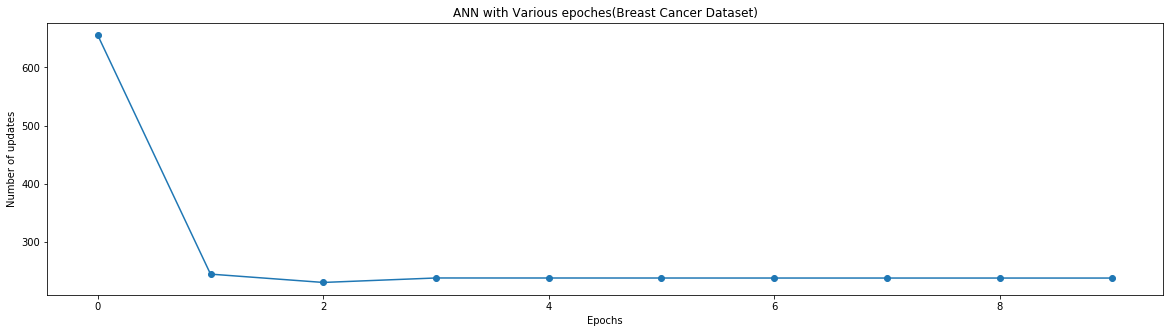

In [13]:
#print the error over epochs
plt.figure(figsize=(20,5)) #width, height settings for figures
plt.plot(range(0, n.ep), np.asfarray(n.E), marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('ANN with Various epoches(Breast Cancer Dataset)')
# plt.savefig('images/02_07.png', dpi=300)
plt.show()


# Test the ANN and compute the Accuracy

In [14]:
n.test(test_data_list)
#print network performance as an accuracy metric
correct = 0 # number of predictions that were correct
input_nodes = 30

#iteratre through each tested instance and accumilate number of correct predictions
for result in n.results:
    if (result[0] == result[1]):
            correct += 1
    pass
pass

# print the accuracy on test set
print ("Test set accuracy% = ", (100 * correct / len(n.results)))

Test set accuracy% =  63.716814159292035


# ANN with various epoches

In [15]:
print("This will take a few moments ...")
n_list = []
epochs = [2,5,10,12,15,20]

for epoch in epochs:
    n = neuralNetwork(epochs=epoch)
    n.train(train_data_list)
    n_list.append(n)

This will take a few moments ...
Training epoch#:  0
errors (SSE):  [979.59878422]
Training epoch#:  1
errors (SSE):  [319.43416979]
Training epoch#:  0
errors (SSE):  [679.58087143]
Training epoch#:  1
errors (SSE):  [274.86374528]
Training epoch#:  2
errors (SSE):  [243.79344376]
Training epoch#:  3
errors (SSE):  [221.04715463]
Training epoch#:  4
errors (SSE):  [217.28169354]
Training epoch#:  0
errors (SSE):  [904.59916954]
Training epoch#:  1
errors (SSE):  [269.86598684]
Training epoch#:  2
errors (SSE):  [232.33975424]
Training epoch#:  3
errors (SSE):  [218.80270135]
Training epoch#:  4
errors (SSE):  [216.45289584]
Training epoch#:  5
errors (SSE):  [215.81925344]
Training epoch#:  6
errors (SSE):  [216.3407775]
Training epoch#:  7
errors (SSE):  [215.99625753]
Training epoch#:  8
errors (SSE):  [215.73849638]
Training epoch#:  9
errors (SSE):  [215.53527369]
Training epoch#:  0
errors (SSE):  [822.26468417]
Training epoch#:  1
errors (SSE):  [397.92137964]
Training epoch#:  

# Gather the results from various size of epoches

In [16]:
#iteratre through each model and accumilate number of correct predictions
model_results = []
for model in n_list: 
    correct = 0
    model.test(test_data_list)
    for result in model.results:
        if (result[0] == result[1]):
                correct += 1
        pass
    correct = 100 * (correct/len(model.results))
    model_results.append(correct)
    print(correct)
    pass
pass

63.716814159292035
63.716814159292035
63.716814159292035
63.716814159292035
63.716814159292035
63.716814159292035


# Plot the results from various size of epoches

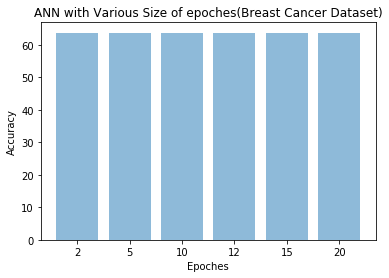

In [17]:
objects =epochs 
y_pos = np.arange(len(objects))
performance = model_results
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Epoches')
plt.title('ANN with Various Size of epoches(Breast Cancer Dataset)')
 
plt.show()

# ANN with various Batch_size

In [18]:
# numpy.random.choice generates a random sample from a given 1-D array
# we can use this to select a sample from our training data in case we want to work with a small sample
# for instance we use a small sample here such as 1500

#mini_training_data = np.random.choice(train_data_list,300, replace = False)
#print("Percentage of training data used:", (len(mini_training_data)/len(train_data_list)) * 100)

print("This will take a few moments ...")
n_list = []
batch_sizes = [1,100,250,350,450]

for batch_size in batch_sizes:
    n = neuralNetwork(batch_size=batch_size)
    n.train(train_data_list)
    n_list.append(n)

This will take a few moments ...
Training epoch#:  0
errors (SSE):  [222.29294026]
Training epoch#:  1
errors (SSE):  [217.44283183]
Training epoch#:  2
errors (SSE):  [217.3506399]
Training epoch#:  3
errors (SSE):  [218.04423759]
Training epoch#:  4
errors (SSE):  [217.71962845]
Training epoch#:  5
errors (SSE):  [217.71234324]
Training epoch#:  6
errors (SSE):  [217.70836243]
Training epoch#:  7
errors (SSE):  [217.70591764]
Training epoch#:  8
errors (SSE):  [217.70426503]
Training epoch#:  9
errors (SSE):  [217.70314875]
Training epoch#:  0
errors (SSE):  [1093.54302249]
Training epoch#:  1
errors (SSE):  [367.15481092]
Training epoch#:  2
errors (SSE):  [232.245112]
Training epoch#:  3
errors (SSE):  [222.13177536]
Training epoch#:  4
errors (SSE):  [220.51679]
Training epoch#:  5
errors (SSE):  [219.04007708]
Training epoch#:  6
errors (SSE):  [219.20123329]
Training epoch#:  7
errors (SSE):  [218.66298019]
Training epoch#:  8
errors (SSE):  [217.02852279]
Training epoch#:  9
er

# Gather the results from various batch size

In [19]:
#iteratre through each model and accumilate number of correct predictions
model_results = []
for model in n_list: 
    correct = 0
    model.test(test_data_list)
    for result in model.results:
        if (result[0] == result[1]):
                correct += 1
        pass
    correct = 100 * (correct/len(model.results))
    model_results.append(correct)
    print(correct)
    pass
pass

63.716814159292035
63.716814159292035
63.716814159292035
63.716814159292035
63.716814159292035


# Plot the results from various batch size

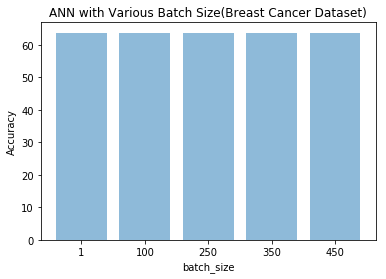

In [20]:
objects = batch_sizes
y_pos = np.arange(len(objects))
performance = model_results
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('batch_size')
plt.title('ANN with Various Batch Size(Breast Cancer Dataset)')
 
plt.show()

# ANN with various learning rate

In [21]:
# numpy.random.choice generates a random sample from a given 1-D array
# we can use this to select a sample from our training data in case we want to work with a small sample
# for instance we use a small sample here such as 1500
#mini_training_data = np.random.choice(train_data_list, 300, replace = False)
#print("Percentage of training data used:", (len(mini_training_data)/len(train_data_list)) * 100)

print("This will take a few moments ...")
n_list = []
learning_rates = [0.1,0.2,0.3,0.4,0.6,0.8,1.0]

for learn in learning_rates:
    n = neuralNetwork(learningrate = learn,batch_size=50)
    n.train(train_data_list)
    n_list.append(n)

This will take a few moments ...
Training epoch#:  0
errors (SSE):  [507.60280525]
Training epoch#:  1
errors (SSE):  [223.71918452]
Training epoch#:  2
errors (SSE):  [219.39936979]
Training epoch#:  3
errors (SSE):  [217.72552865]
Training epoch#:  4
errors (SSE):  [216.84204338]
Training epoch#:  5
errors (SSE):  [216.29459391]
Training epoch#:  6
errors (SSE):  [215.92215463]
Training epoch#:  7
errors (SSE):  [215.65208498]
Training epoch#:  8
errors (SSE):  [215.4428702]
Training epoch#:  9
errors (SSE):  [214.75852139]
Training epoch#:  0
errors (SSE):  [570.13340095]
Training epoch#:  1
errors (SSE):  [224.3121766]
Training epoch#:  2
errors (SSE):  [223.18024501]
Training epoch#:  3
errors (SSE):  [220.00244953]
Training epoch#:  4
errors (SSE):  [220.16822911]
Training epoch#:  5
errors (SSE):  [219.94517258]
Training epoch#:  6
errors (SSE):  [219.8001611]
Training epoch#:  7
errors (SSE):  [219.69780956]
Training epoch#:  8
errors (SSE):  [219.62160413]
Training epoch#:  9


# gathering the results from various learing rate ANN

In [22]:
#iteratre through each model and accumilate number of correct predictions
model_results = []
for model in n_list: 
    correct = 0
    model.test(test_data_list)
    for result in model.results:
        if (result[0] == result[1]):
                correct += 1
        pass
    correct = 100 * (correct/len(model.results))
    model_results.append(correct)
    print(correct)
    pass
pass


# print the accuracy on test set
#print ("Test set accuracy% = ", (100 * correct / len(n.results)))

63.716814159292035
63.716814159292035
63.716814159292035
63.716814159292035
63.716814159292035
36.283185840707965
36.283185840707965


# Plotting the accuray from Various learning rate

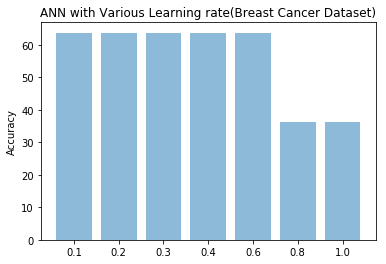

In [23]:
objects = learning_rates
y_pos = np.arange(len(objects))
performance = model_results
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Learning_rate')
plt.title('ANN with Various Learning rate(Breast Cancer Dataset)')
 
plt.show()